<a href="https://colab.research.google.com/github/VivekAChawla/DPRG-Test/blob/main/DPRG_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🧪 Noisy Curve Fitting — Mini Hackathon (Colab)

This quick demo has:
1) **Make noisy data** (synthetic with heteroscedastic noise)  
2) **Simple curve fit** baseline (sine + line)  
Then **your turn** with suggested next steps and a submission convention.


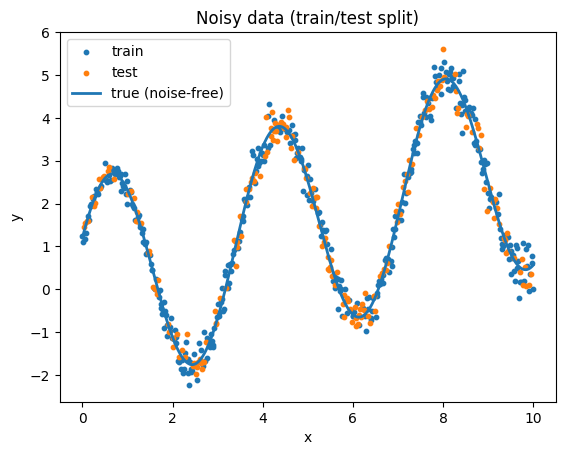

Saved train.csv and test.csv


In [1]:
# 1) Make noisy data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Reproducibility
rng = np.random.default_rng(42)

# True function
def true_fn(x, A=2.5, B=1.7, phi=0.5, C=0.3):
    return A * np.sin(B * x + phi) + C * x

# Heteroscedastic noise (std grows mildly with x and oscillation)
def noise_std(x, base=0.15, slope=0.06):
    return base + slope * np.abs(np.sin(0.5 * x)) + 0.01 * x

# Generate data
n = 600
x = np.linspace(0, 10, n)
y_true = true_fn(x)
sigma = noise_std(x)
y = y_true + rng.normal(0, sigma)

# Train / test split
idx = np.arange(n)
rng.shuffle(idx)
train_idx = idx[:400]
test_idx = idx[400:]

x_train, y_train = x[train_idx], y[train_idx]
x_test, y_test = x[test_idx], y[test_idx]

# Quick look
plt.figure()
plt.scatter(x_train, y_train, s=10, label="train")
plt.scatter(x_test, y_test, s=10, label="test")
plt.plot(x, y_true, linewidth=2, label="true (noise-free)")
plt.title("Noisy data (train/test split)")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

# Save for convenience
pd.DataFrame({"x": x_train, "y": y_train}).to_csv("train.csv", index=False)
pd.DataFrame({"x": x_test, "y": y_test}).to_csv("test.csv", index=False)
print("Saved train.csv and test.csv")


Fitted params [A, B, phi, C]: [2.51692664 1.6979757  0.50670835 0.29826322]


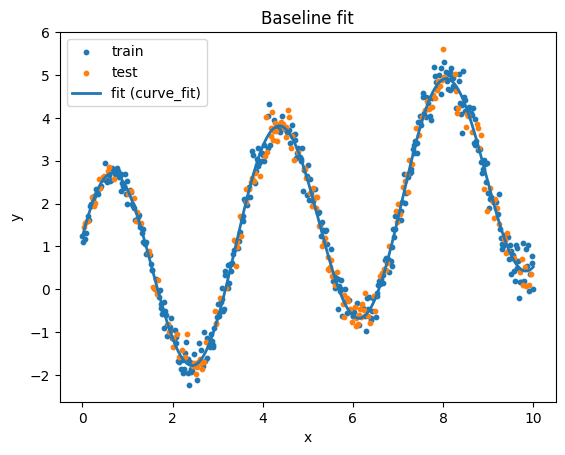

Test RMSE: 0.2339
Saved predictions.csv


In [2]:
# 2) Simple curve fit (baseline)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Load (or reuse variables from above)
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

def model(x, A, B, phi, C):
    return A * np.sin(B * x + phi) + C * x

x_tr, y_tr = train["x"].values, train["y"].values
x_te, y_te = test["x"].values, test["y"].values

# Reasonable initial guesses
p0 = [2.0, 1.5, 0.0, 0.0]
popt, pcov = curve_fit(model, x_tr, y_tr, p0=p0, maxfev=5000)
print("Fitted params [A, B, phi, C]:", popt)

# Predict on a fine grid and test set
x_grid = np.linspace(0, 10, 500)
y_pred_grid = model(x_grid, *popt)
y_pred_test = model(x_te, *popt)

# Plot fit vs data
plt.figure()
plt.scatter(x_tr, y_tr, s=10, label="train")
plt.scatter(x_te, y_te, s=10, label="test")
plt.plot(x_grid, y_pred_grid, linewidth=2, label="fit (curve_fit)")
plt.title("Baseline fit")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

# Simple RMSE on test
rmse = np.sqrt(np.mean((y_te - y_pred_test)**2))
print(f"Test RMSE: {rmse:.4f}")

# Save predictions for potential scoring
pd.DataFrame({"x": x_te, "y_pred": y_pred_test}).to_csv("predictions.csv", index=False)
print("Saved predictions.csv")


## 🚀 Your turn

Try to beat the baseline RMSE:




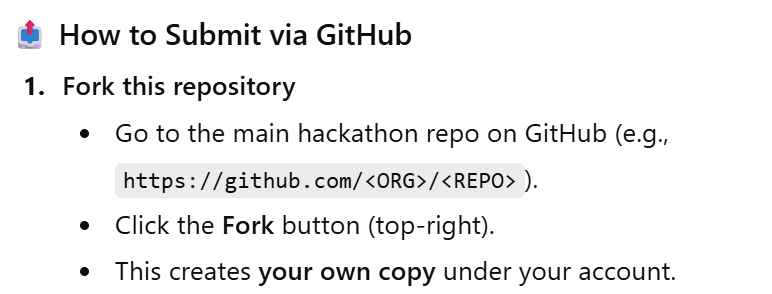

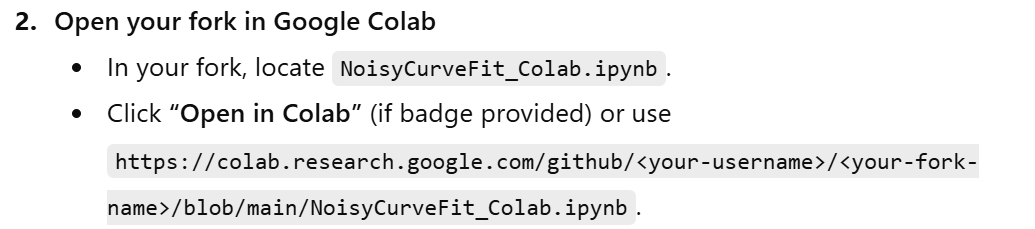

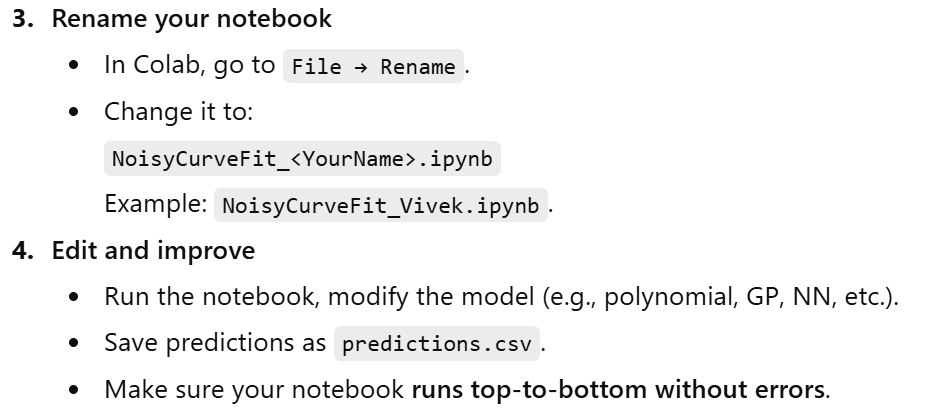

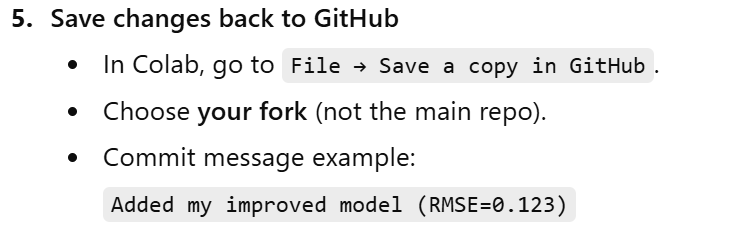

# I should be able to then accept the submissions